In [1]:
from Functions import Estimation_dsbm
from Functions.functions import *
from Functions.functions_density import *

import warnings
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
from sklearn.metrics.cluster import normalized_mutual_info_score

import numpy as np
import networkx as nx

from scipy.sparse.linalg import svds

In [2]:
import warnings
warnings.filterwarnings("ignore")

There are three main sections: (1) directed graphs, (2) undirected graphs, and (3) varying group ratios~$\pi$. In each section, we apply both $k$-means clustering and Gaussian mixture models (GMMs).

# 1. Directed

## (1) K-Means

In [5]:
n = 1000
sparsity = np.linspace(0.03, 0.2, 10)
iteration = 50  # Number of iterations per sparsity level

sizes = [500, 500]
clusters, labels = make_labels(n, sizes)


P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])

k = 2
d = 2

method = 'K-Means'


# Call the function
results = process_sparsity_iterations_SBM(n, labels, iteration, sizes, P_matrix, sparsity, d, k, True, method)

# Unpack results
( 
    dense2_k2_dir_kmeans,
    
    NMI2_sc_k2_dir_kmeans, NMI2_ase1_k2_dir_kmeans, NMI2_ase2_k2_dir_kmeans, NMI2_dase_k2_dir_kmeans,
    std2_sc_k2_dir_kmeans, std2_ase1_k2_dir_kmeans, std2_ase2_k2_dir_kmeans, std2_dase_k2_dir_kmeans,
    time2_sc_k2_dir_kmeans, time2_ase1_k2_dir_kmeans, time2_ase2_k2_dir_kmeans, time2_dase_k2_dir_kmeans
) = results

Processing:   0%|          | 0/500 [00:00<?, ?it/s]

Processing completed.


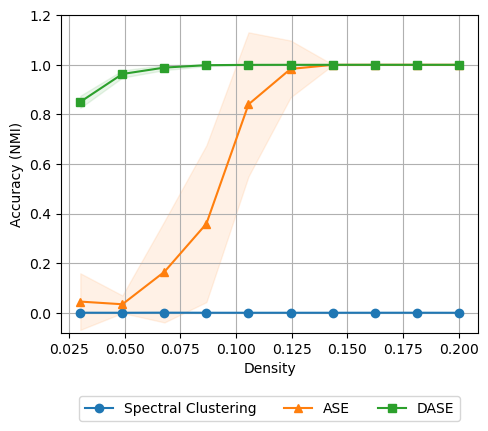

In [6]:
# plt.figure(figsize=(10, 6))
plt.figure(figsize = (5, 4.5))

plt.plot(dense2_k2_dir_kmeans, NMI2_sc_k2_dir_kmeans, label="Spectral Clustering", marker='o', linestyle='-', color='#1f77b4')
plt.fill_between(dense2_k2_dir_kmeans, np.array(NMI2_sc_k2_dir_kmeans) - np.array(std2_sc_k2_dir_kmeans),
                    np.array(NMI2_sc_k2_dir_kmeans) + np.array(std2_sc_k2_dir_kmeans), color='#1f77b4', alpha=0.1)

plt.plot(dense2_k2_dir_kmeans, NMI2_ase1_k2_dir_kmeans, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(dense2_k2_dir_kmeans, np.array(NMI2_ase1_k2_dir_kmeans) - np.array(std2_ase1_k2_dir_kmeans),
                    np.array(NMI2_ase1_k2_dir_kmeans) + np.array(std2_ase1_k2_dir_kmeans), color='#ff7f0e', alpha=0.1)

plt.plot(dense2_k2_dir_kmeans, NMI2_dase_k2_dir_kmeans, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(dense2_k2_dir_kmeans, np.array(NMI2_dase_k2_dir_kmeans) - np.array(std2_dase_k2_dir_kmeans),
                    np.array(NMI2_dase_k2_dir_kmeans) + np.array(std2_dase_k2_dir_kmeans), color='#2ca02c', alpha=0.1)

plt.xlabel('Density')
plt.ylabel('Accuracy (NMI)')
plt.ylim(-0.08, 1.2)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.grid()
plt.tight_layout()
plt.show()

## (2) GMM

In [3]:
n = 1000
sparsity = np.linspace(0.03, 0.2, 10)
iteration = 50  # Number of iterations per sparsity level

sizes = [500, 500]
clusters, labels = make_labels(n, sizes)


P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])

k = 2
d = 2

method = 'GMM'


# Call the function
results = process_sparsity_iterations_SBM(n, labels, iteration, sizes, P_matrix, sparsity, d, k, True, method)

# Unpack results
( 
    dense2_k2_dir_gmm,
    
    NMI2_sc_k2_dir_gmm, NMI2_ase1_k2_dir_gmm, NMI2_ase2_k2_dir_gmm, NMI2_dase_k2_dir_gmm,
    std2_sc_k2_dir_gmm, std2_ase1_k2_dir_gmm, std2_ase2_k2_dir_gmm, std2_dase_k2_dir_gmm,
    time2_sc_k2_dir_gmm, time2_ase1_k2_dir_gmm, time2_ase2_k2_dir_gmm, time2_dase_k2_dir_gmm
) = results

Processing:   0%|          | 0/500 [00:00<?, ?it/s]

Processing completed.


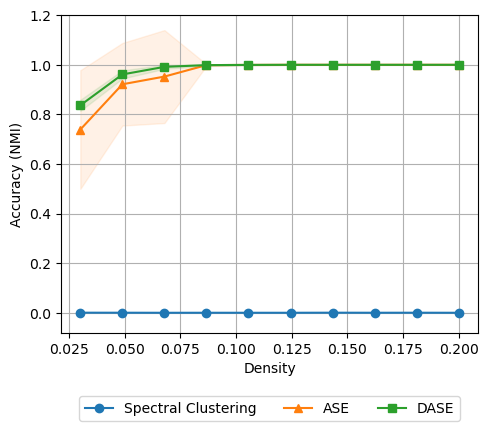

In [4]:
# plt.figure(figsize=(10, 6))
plt.figure(figsize = (5, 4.5))

plt.plot(dense2_k2_dir_gmm, NMI2_sc_k2_dir_gmm, label="Spectral Clustering", marker='o', linestyle='-', color='#1f77b4')
plt.fill_between(dense2_k2_dir_gmm, np.array(NMI2_sc_k2_dir_gmm) - np.array(std2_sc_k2_dir_gmm),
                    np.array(NMI2_sc_k2_dir_gmm) + np.array(std2_sc_k2_dir_gmm), color='#1f77b4', alpha=0.1)

plt.plot(dense2_k2_dir_gmm, NMI2_ase1_k2_dir_gmm, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(dense2_k2_dir_gmm, np.array(NMI2_ase1_k2_dir_gmm) - np.array(std2_ase1_k2_dir_gmm),
                    np.array(NMI2_ase1_k2_dir_gmm) + np.array(std2_ase1_k2_dir_gmm), color='#ff7f0e', alpha=0.1)

plt.plot(dense2_k2_dir_gmm, NMI2_dase_k2_dir_gmm, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(dense2_k2_dir_gmm, np.array(NMI2_dase_k2_dir_gmm) - np.array(std2_dase_k2_dir_gmm),
                    np.array(NMI2_dase_k2_dir_gmm) + np.array(std2_dase_k2_dir_gmm), color='#2ca02c', alpha=0.1)

plt.xlabel('Density')
plt.ylabel('Accuracy (NMI)')
plt.ylim(-0.08, 1.2)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
# plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.grid()
plt.tight_layout()
plt.show()

# 2. Undirected

### (1) K-Means

In [7]:
n = 1000
sparsity = np.linspace(0.03, 0.2, 10)
iteration = 50  # Number of iterations per sparsity level

sizes = [500, 500]
clusters, labels = make_labels(n, sizes)


P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])

k = 2
d = 2

method = 'K-Means'
direction = False


# Call the function
results = process_sparsity_iterations_SBM(n, labels, iteration, sizes, P_matrix, sparsity, d, k, direction, method)

# Unpack results
( 
    dense2_k2_undir_kmeans,
    
    NMI2_sc_k2_undir_kmeans, NMI2_ase_k2_undir_kmeans, NMI2_ase2_k2_undir_kmeans, NMI2_dase_k2_undir_kmeans,
    std2_sc_k2_undir_kmeans, std2_ase_k2_undir_kmeans, std2_ase2_k2_undir_kmeans, std2_dase_k2_undir_kmeans,
    time2_sc_k2_undir_kmeans, time2_ase_k2_undir_kmeans, time2_ase2_k2_undir_kmeans, time2_dase_k2_undir_kmeans
) = results

Processing:   0%|          | 0/500 [00:00<?, ?it/s]

Processing completed.


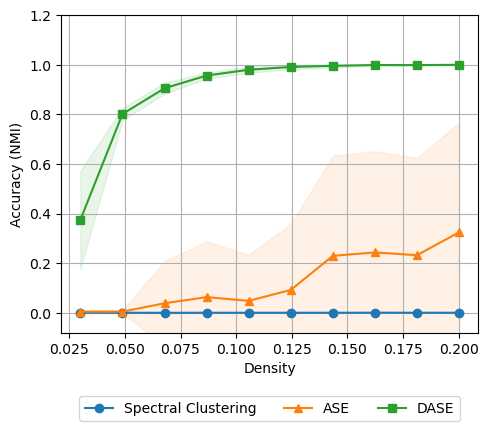

In [8]:
# plt.figure(figsize=(10, 6))
plt.figure(figsize = (5, 4.5))

plt.plot(dense2_k2_undir_kmeans, NMI2_sc_k2_undir_kmeans, label="Spectral Clustering", marker='o', linestyle='-', color='#1f77b4')
plt.fill_between(dense2_k2_undir_kmeans, np.array(NMI2_sc_k2_undir_kmeans) - np.array(std2_sc_k2_undir_kmeans),
                    np.array(NMI2_sc_k2_undir_kmeans) + np.array(std2_sc_k2_undir_kmeans), color='#1f77b4', alpha=0.1)

plt.plot(dense2_k2_undir_kmeans, NMI2_ase_k2_undir_kmeans, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(dense2_k2_undir_kmeans, np.array(NMI2_ase_k2_undir_kmeans) - np.array(std2_ase_k2_undir_kmeans),
                    np.array(NMI2_ase_k2_undir_kmeans) + np.array(std2_ase_k2_undir_kmeans), color='#ff7f0e', alpha=0.1)

plt.plot(dense2_k2_undir_kmeans, NMI2_dase_k2_undir_kmeans, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(dense2_k2_undir_kmeans, np.array(NMI2_dase_k2_undir_kmeans) - np.array(std2_dase_k2_undir_kmeans),
                    np.array(NMI2_dase_k2_undir_kmeans) + np.array(std2_dase_k2_undir_kmeans), color='#2ca02c', alpha=0.1)

plt.xlabel('Density')
plt.ylabel('Accuracy (NMI)')
plt.ylim(-0.08, 1.2)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.grid()
plt.tight_layout()
plt.show()

### (2) GMM

In [9]:
n = 1000
sparsity = np.linspace(0.03, 0.2, 10)
iteration = 50  # Number of iterations per sparsity level

sizes = [500, 500]
clusters, labels = make_labels(n, sizes)


P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])

k = 2
d = 2

method = 'GMM'


# Call the function
results = process_sparsity_iterations_SBM(n, labels, iteration, sizes, P_matrix, sparsity, d, k, False, method)

# Unpack results
( 
    dense2_k2_undir_gmm,
    
    NMI2_sc_k2_undir_gmm, NMI2_ase_k2_undir_gmm, NMI2_ase2_k2_undir_gmm, NMI2_dase_k2_undir_gmm,
    std2_sc_k2_undir_gmm, std2_ase_k2_undir_gmm, std2_ase2_k2_undir_gmm, std2_dase_k2_undir_gmm,
    time2_sc_k2_undir_gmm, time2_ase_k2_undir_gmm, time2_ase2_k2_undir_gmm, time2_dase_k2_undir_gmm
) = results

Processing:   0%|          | 0/500 [00:00<?, ?it/s]

Processing completed.


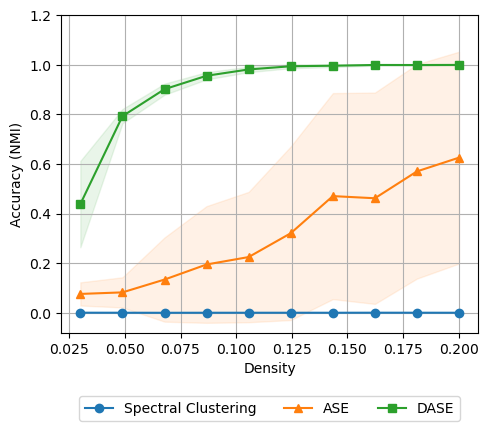

In [10]:
# plt.figure(figsize=(10, 6))
plt.figure(figsize = (5, 4.5))

plt.plot(dense2_k2_undir_gmm, NMI2_sc_k2_undir_gmm, label="Spectral Clustering", marker='o', linestyle='-', color='#1f77b4')
plt.fill_between(dense2_k2_undir_gmm, np.array(NMI2_sc_k2_undir_gmm) - np.array(std2_sc_k2_undir_gmm),
                    np.array(NMI2_sc_k2_undir_gmm) + np.array(std2_sc_k2_undir_gmm), color='#1f77b4', alpha=0.1)

plt.plot(dense2_k2_undir_gmm, NMI2_ase_k2_undir_gmm, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(dense2_k2_undir_gmm, np.array(NMI2_ase_k2_undir_gmm) - np.array(std2_ase_k2_undir_gmm),
                    np.array(NMI2_ase_k2_undir_gmm) + np.array(std2_ase_k2_undir_gmm), color='#ff7f0e', alpha=0.1)

plt.plot(dense2_k2_undir_gmm, NMI2_dase_k2_undir_gmm, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(dense2_k2_undir_gmm, np.array(NMI2_dase_k2_undir_gmm) - np.array(std2_dase_k2_undir_gmm),
                    np.array(NMI2_dase_k2_undir_gmm) + np.array(std2_dase_k2_undir_gmm), color='#2ca02c', alpha=0.1)

plt.xlabel('Density')
plt.ylabel('Accuracy (NMI)')
plt.ylim(-0.08, 1.2)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.grid()
plt.tight_layout()
plt.show()

# 3. Group Ratio

### Directed

#### (1) K-Means

In [11]:
# directed
N = 1000
sparsity = [0.05]
iteration = 50  # Number of iterations per sparsity level
size_ratio = [[0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5],
              [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]


P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])


k = 2
d = 2

direction = True
method = 'K-Means'

# Call the function
results = process_group_ratio_iterations_SBM(N, sparsity, iteration, size_ratio, P_matrix, d, k, direction, method)

# Unpack results
(
    dense_k2_dir_kmeans, ratio_k2_dir_kmeans,
    
    NMI3_sc_k2_dir_kmeans, NMI3_ase_k2_dir_kmeans, NMI3_ase2_k2_dir_kmeans, NMI3_dase_k2_dir_kmeans,
    std3_sc_k2_dir_kmeans, std3_ase_k2_dir_kmeans, std3_ase2_k2_dir_kmeans, std3_dase_k2_dir_kmeans,
    time3_sc_k2_dir_kmeans, time3_ase_k2_dir_kmeans, time3_ase2_k2_dir_kmeans, time3_dase_k2_dir_kmeans
) = results

Processing:   0%|          | 0/450 [00:00<?, ?it/s]

Processing completed.


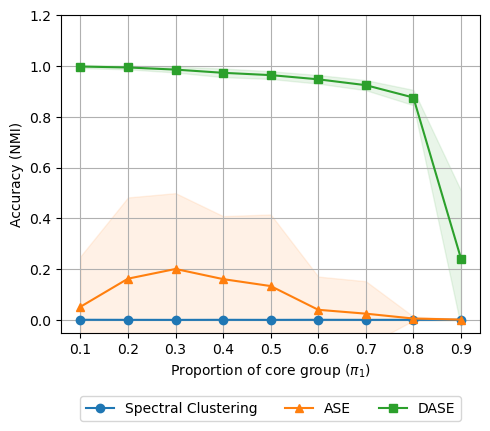

In [12]:
# plt.figure(figsize=(8, 5))
plt.figure(figsize=(5, 4.5))

plt.plot(ratio_k2_dir_kmeans, NMI3_sc_k2_dir_kmeans, label="Spectral Clustering", marker='o', linestyle='-', color='#1f77b4')
plt.fill_between(ratio_k2_dir_kmeans, np.array(NMI3_sc_k2_dir_kmeans) - np.array(std3_sc_k2_dir_kmeans),
                    np.array(NMI3_sc_k2_dir_kmeans) + np.array(std3_sc_k2_dir_kmeans), color='#1f77b4', alpha=0.1)

plt.plot(ratio_k2_dir_kmeans, NMI3_ase_k2_dir_kmeans, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(ratio_k2_dir_kmeans, np.array(NMI3_ase_k2_dir_kmeans) - np.array(std3_ase_k2_dir_kmeans),
                    np.array(NMI3_ase_k2_dir_kmeans) + np.array(std3_ase_k2_dir_kmeans), color='#ff7f0e', alpha=0.1)

plt.plot(ratio_k2_dir_kmeans, NMI3_dase_k2_dir_kmeans, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(ratio_k2_dir_kmeans, np.array(NMI3_dase_k2_dir_kmeans) - np.array(std3_dase_k2_dir_kmeans),
                    np.array(NMI3_dase_k2_dir_kmeans) + np.array(std3_dase_k2_dir_kmeans), color='#2ca02c', alpha=0.1)


plt.xlabel(r'Proportion of core group ($\pi_1$)')
plt.ylabel('Accuracy (NMI)')
plt.ylim(-0.05, 1.2)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.grid()
plt.tight_layout()
plt.show()

#### (2) GMM

In [13]:
# directed
N = 1000
sparsity = [0.05]
iteration = 50  # Number of iterations per sparsity level
size_ratio = [[0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5],
              [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]


P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])


k = 2
d = 2

direction = True
method = 'GMM'

# Call the function
results = process_group_ratio_iterations_SBM(N, sparsity, iteration, size_ratio, P_matrix, d, k, direction, method)

# Unpack results
(
    dense_k2_dir_gmm, ratio_k2_dir_gmm,
    
    NMI3_sc_k2_dir_gmm, NMI3_ase_k2_dir_gmm, NMI3_ase2_k2_dir_gmm, NMI3_dase_k2_dir_gmm,
    std3_sc_k2_dir_gmm, std3_ase_k2_dir_gmm, std3_ase2_k2_dir_gmm, std3_dase_k2_dir_gmm,
    time3_sc_k2_dir_gmm, time3_ase_k2_dir_gmm, time3_ase2_k2_dir_gmm, time3_dase_k2_dir_gmm
) = results

Processing:   0%|          | 0/450 [00:00<?, ?it/s]

Processing completed.


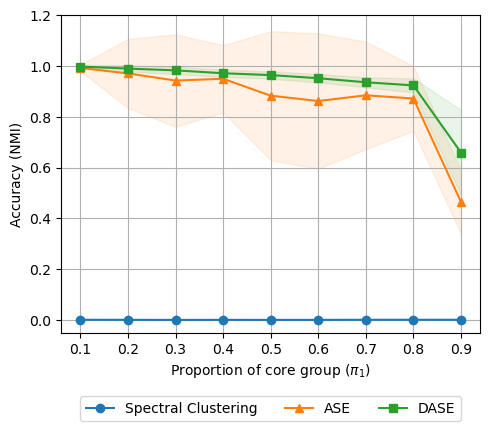

In [14]:
# plt.figure(figsize=(8, 5))
plt.figure(figsize=(5, 4.5))

plt.plot(ratio_k2_dir_gmm, NMI3_sc_k2_dir_gmm, label="Spectral Clustering", marker='o', linestyle='-', color='#1f77b4')
plt.fill_between(ratio_k2_dir_gmm, np.array(NMI3_sc_k2_dir_gmm) - np.array(std3_sc_k2_dir_gmm),
                    np.array(NMI3_sc_k2_dir_gmm) + np.array(std3_sc_k2_dir_gmm), color='#1f77b4', alpha=0.1)

plt.plot(ratio_k2_dir_gmm, NMI3_ase_k2_dir_gmm, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(ratio_k2_dir_gmm, np.array(NMI3_ase_k2_dir_gmm) - np.array(std3_ase_k2_dir_gmm),
                    np.array(NMI3_ase_k2_dir_gmm) + np.array(std3_ase_k2_dir_gmm), color='#ff7f0e', alpha=0.1)

plt.plot(ratio_k2_dir_gmm, NMI3_dase_k2_dir_gmm, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(ratio_k2_dir_gmm, np.array(NMI3_dase_k2_dir_gmm) - np.array(std3_dase_k2_dir_gmm),
                    np.array(NMI3_dase_k2_dir_gmm) + np.array(std3_dase_k2_dir_gmm), color='#2ca02c', alpha=0.1)


plt.xlabel(r'Proportion of core group ($\pi_1$)')
plt.ylabel('Accuracy (NMI)')
plt.ylim(-0.05, 1.2)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.grid()
plt.tight_layout()
plt.show()

### Undirected

#### (1) K-Means

In [15]:
# undirected
N = 1000
sparsity = [0.05]
iteration = 50  # Number of iterations per sparsity level
size_ratio = [[0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5],
              [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]


P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])


k = 2
d = 2

direction = False
method = 'K-Means'

# Call the function
results = process_group_ratio_iterations_SBM(N, sparsity, iteration, size_ratio, P_matrix, d, k, direction, method)

# Unpack results
(
    dense_k2_undir_kmeans, ratio_k2_undir_kmeans,
    
    NMI3_sc_k2_undir_kmeans, NMI3_ase_k2_undir_kmeans, NMI3_ase2_k2_undir_kmeans, NMI3_dase_k2_undir_kmeans,
    std3_sc_k2_undir_kmeans, std3_ase_k2_undir_kmeans, std3_ase2_k2_undir_kmeans, std3_dase_k2_undir_kmeans,
    time3_sc_k2_undir_kmeans, time3_ase_k2_undir_kmeans, time3_ase2_k2_undir_kmeans, time3_dase_k2_undir_kmeans
) = results

Processing:   0%|          | 0/450 [00:00<?, ?it/s]

Processing completed.


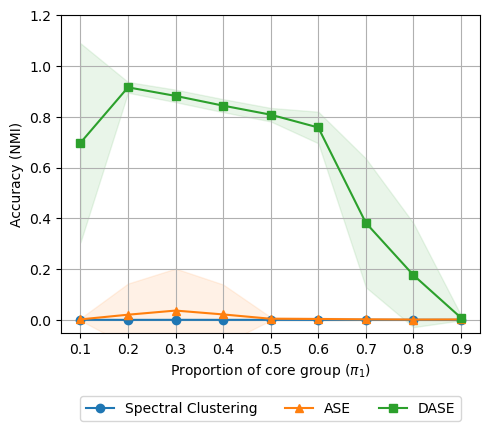

In [16]:
# plt.figure(figsize=(8, 5))
plt.figure(figsize=(5, 4.5))

plt.plot(ratio_k2_undir_kmeans, NMI3_sc_k2_undir_kmeans, label="Spectral Clustering", marker='o', linestyle='-', color='#1f77b4')
plt.fill_between(ratio_k2_undir_kmeans, np.array(NMI3_sc_k2_undir_kmeans) - np.array(std3_sc_k2_undir_kmeans),
                    np.array(NMI3_sc_k2_undir_kmeans) + np.array(std3_sc_k2_undir_kmeans), color='#1f77b4', alpha=0.1)

plt.plot(ratio_k2_undir_kmeans, NMI3_ase_k2_undir_kmeans, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(ratio_k2_undir_kmeans, np.array(NMI3_ase_k2_undir_kmeans) - np.array(std3_ase_k2_undir_kmeans),
                    np.array(NMI3_ase_k2_undir_kmeans) + np.array(std3_ase_k2_undir_kmeans), color='#ff7f0e', alpha=0.1)

plt.plot(ratio_k2_undir_kmeans, NMI3_dase_k2_undir_kmeans, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(ratio_k2_undir_kmeans, np.array(NMI3_dase_k2_undir_kmeans) - np.array(std3_dase_k2_undir_kmeans),
                    np.array(NMI3_dase_k2_undir_kmeans) + np.array(std3_dase_k2_undir_kmeans), color='#2ca02c', alpha=0.1)


plt.xlabel(r'Proportion of core group ($\pi_1$)')
plt.ylabel('Accuracy (NMI)')
plt.ylim(-0.05, 1.2)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.grid()
plt.tight_layout()
plt.show()

#### (2) GMM

In [17]:
# undirected
N = 1000
sparsity = [0.05]
iteration = 50  # Number of iterations per sparsity level
size_ratio = [[0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5],
              [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]


P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])


k = 2
d = 2

undirection = False
method = 'GMM'

# Call the function
results = process_group_ratio_iterations_SBM(N, sparsity, iteration, size_ratio, P_matrix, d, k, undirection, method)

# Unpack results
(
    dense_k2_undir_gmm, ratio_k2_undir_gmm,
    
    NMI3_sc_k2_undir_gmm, NMI3_ase_k2_undir_gmm, NMI3_ase2_k2_undir_gmm, NMI3_dase_k2_undir_gmm,
    std3_sc_k2_undir_gmm, std3_ase_k2_undir_gmm, std3_ase2_k2_undir_gmm, std3_dase_k2_undir_gmm,
    time3_sc_k2_undir_gmm, time3_ase_k2_undir_gmm, time3_ase2_k2_undir_gmm, time3_dase_k2_undir_gmm
) = results

Processing:   0%|          | 0/450 [00:00<?, ?it/s]

Processing completed.


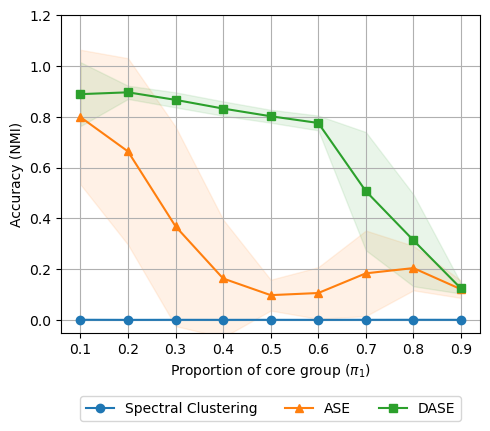

In [18]:
# plt.figure(figsize=(8, 5))
plt.figure(figsize=(5, 4.5))

plt.plot(ratio_k2_undir_gmm, NMI3_sc_k2_undir_gmm, label="Spectral Clustering", marker='o', linestyle='-', color='#1f77b4')
plt.fill_between(ratio_k2_undir_gmm, np.array(NMI3_sc_k2_undir_gmm) - np.array(std3_sc_k2_undir_gmm),
                    np.array(NMI3_sc_k2_undir_gmm) + np.array(std3_sc_k2_undir_gmm), color='#1f77b4', alpha=0.1)

plt.plot(ratio_k2_undir_gmm, NMI3_ase_k2_undir_gmm, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(ratio_k2_undir_gmm, np.array(NMI3_ase_k2_undir_gmm) - np.array(std3_ase_k2_undir_gmm),
                    np.array(NMI3_ase_k2_undir_gmm) + np.array(std3_ase_k2_undir_gmm), color='#ff7f0e', alpha=0.1)

plt.plot(ratio_k2_undir_gmm, NMI3_dase_k2_undir_gmm, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(ratio_k2_undir_gmm, np.array(NMI3_dase_k2_undir_gmm) - np.array(std3_dase_k2_undir_gmm),
                    np.array(NMI3_dase_k2_undir_gmm) + np.array(std3_dase_k2_undir_gmm), color='#2ca02c', alpha=0.1)


plt.xlabel(r'Proportion of core group ($\pi_1$)')
plt.ylabel('Accuracy (NMI)')
plt.ylim(-0.05, 1.2)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.grid()
plt.tight_layout()
plt.show()